<div style="background-color:#caeec2; padding:10px; border-radius:6px; color:black;" >

### 1.  Data Collection And Preparation
</div>

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from scipy.stats import skew

<div style="background-color:#f0f8ff; padding:10px; border-radius:6px; color:black;" >
Here, I am loading the dataset, and doing some initial cleaning.


</div>


In [2]:
# Loading the dataset
hair_data = pd.read_csv('../Data/Predict Hair Fall.csv')
hair_data.describe(include='all')

# Upon loading the dataset, we can see that the index column contains the id assigned to the participant. So, we will drop this column and reset the index.
hair_data['Id'] = np.arange(len(hair_data))
# converting to csv back

# Checking the structure of the dataset
print(hair_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Id                         999 non-null    int64 
 1   Genetics                   999 non-null    object
 2   Hormonal Changes           999 non-null    object
 3   Medical Conditions         999 non-null    object
 4   Medications & Treatments   999 non-null    object
 5   Nutritional Deficiencies   999 non-null    object
 6   Stress                     999 non-null    object
 7   Age                        999 non-null    int64 
 8   Poor Hair Care Habits      999 non-null    object
 9   Environmental Factors      999 non-null    object
 10  Smoking                    999 non-null    object
 11  Weight Loss                999 non-null    object
 12  Hair Loss                  999 non-null    int64 
dtypes: int64(3), object(10)
memory usage: 101.6+ KB
None


In [3]:
print(hair_data.isnull().sum())

Id                           0
Genetics                     0
Hormonal Changes             0
Medical Conditions           0
Medications & Treatments     0
Nutritional Deficiencies     0
Stress                       0
Age                          0
Poor Hair Care Habits        0
Environmental Factors        0
Smoking                      0
Weight Loss                  0
Hair Loss                    0
dtype: int64


In [4]:
columns = ['Id', 'Genetics', 'Hormonal_Changes', 'Medical_Conditions',
       'Medications_and_Treatments', 'Nutritional_Deficiencies', 'Stress',
       'Age', 'Poor_Hair_Care_Habits', 'Environmental_Factors', 'Smoking',
       'Weight_Loss', 'Hair_Loss']

hair_data.columns = columns

hair_data.columns = [col.replace(' ', '_') for col in hair_data.columns]


In [5]:
# Although it looks like there are no missing values in this dataset, however, the missing data is represented as 'No Data' string
hair_data.replace(['No Data', 'No data'], pd.NA , inplace=True)
print(hair_data.isnull().sum())

Id                              0
Genetics                        0
Hormonal_Changes                0
Medical_Conditions            110
Medications_and_Treatments      2
Nutritional_Deficiencies       80
Stress                          0
Age                             0
Poor_Hair_Care_Habits           0
Environmental_Factors           0
Smoking                         0
Weight_Loss                     0
Hair_Loss                       0
dtype: int64


In [6]:
# pd.DataFrame(hair_data).to_csv('Data/Predict Hair Fall Raw.csv', index=False)

<div style="background-color:#f0f8ff; padding:10px; border-radius:6px; color:black;" >
Now, I will provide the statistcal summaries of the key variables.


</div>


In [7]:
print(skew(hair_data['Age']))
hair_data.describe()


-0.03444861068508618


,Id,Age,Hair_Loss
count,999.000000,999.000000,999.000000
mean,499.000000,34.188188,0.497497
std,288.530761,9.377980,0.500244
min,0.000000,18.000000,0.000000
25%,249.500000,26.000000,0.000000
50%,499.000000,34.000000,0.000000
75%,748.500000,42.000000,1.000000
max,998.000000,50.000000,1.000000


<div style="background-color:#ADD8E6; padding:10px; border-radius:6px; color:black;" >

#### Age

- There are 999 values in the dataset.
- The age of the individual ranges from 18 to 50, with mean age being 34. 
- The standard deviation of 9.37 in the age shows a moderate spread in the range.
- Skewness of -0.03 is very close to zero, indicating that the age distribution is nearly symmetric. This means the ages are evenly spread on both sides of the mean.

#### Hair Loss

- Around 49.8% people in the dataset reported hairloss based on various factors.
</div>

<div style="background-color:#f0f8ff; padding:10px; border-radius:6px; color:black;" >
Now, I will do the encoding of categorical variables


</div>


In [8]:
# Changing the column names and adding underscore for better readability
columns = ['Id', 'Genetics', 'Hormonal_Changes', 'Medical_Conditions',
       'Medications_and_Treatments', 'Nutritional_Deficiencies', 'Stress',
       'Age', 'Poor_Hair_Care_Habits', 'Environmental_Factors', 'Smoking',
       'Weight_Loss', 'Hair_Loss']

hair_data.columns = columns

hair_data.columns = [col.replace(' ', '_') for col in hair_data.columns]
print(hair_data.columns)

Index(['Id', 'Genetics', 'Hormonal_Changes', 'Medical_Conditions',
       'Medications_and_Treatments', 'Nutritional_Deficiencies', 'Stress',
       'Age', 'Poor_Hair_Care_Habits', 'Environmental_Factors', 'Smoking',
       'Weight_Loss', 'Hair_Loss'],
      dtype='object')


In [9]:
# Printing the unqiue values in a column to see which columns need encoding
print(hair_data['Genetics'].unique())
print(hair_data['Hormonal_Changes'].unique())
print(hair_data['Poor_Hair_Care_Habits'].unique())
print(hair_data['Environmental_Factors'].unique())
print(hair_data['Smoking'].unique())
print(hair_data['Weight_Loss'].unique())



['Yes' 'No']
['No' 'Yes']
['Yes' 'No']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']


In [10]:

print(hair_data.head())
hair_data['Genetic_Encoding'] = hair_data['Genetics'].map({'Yes': 1, 'No': 0})
hair_data['Hormonal_Encoding'] = hair_data['Hormonal_Changes'].map({'Yes': 1, 'No': 0})
hair_data['Poor_Hair_Care_Encoding'] = hair_data['Poor_Hair_Care_Habits'].map({'Yes': 1, 'No': 0})
hair_data['Environmental_Encoding'] = hair_data['Environmental_Factors'].map({'Yes': 1, 'No': 0})
hair_data['Smoking_Encoding'] = hair_data['Smoking'].map({'Yes': 1, 'No': 0})
hair_data['Weight_Loss_Encoding'] = hair_data['Weight_Loss'].map({'Yes': 1, 'No': 0})


   Id Genetics Hormonal_Changes Medical_Conditions Medications_and_Treatments  \
0   0      Yes               No               <NA>                       <NA>   
1   1       No               No             Eczema                Antibiotics   
2   2       No               No         Dermatosis           Antifungal Cream   
3   3      Yes              Yes           Ringworm                Antibiotics   
4   4       No               No          Psoriasis                   Accutane   

  Nutritional_Deficiencies    Stress  Age Poor_Hair_Care_Habits  \
0     Magnesium deficiency  Moderate   19                   Yes   
1     Magnesium deficiency      High   43                   Yes   
2       Protein deficiency  Moderate   26                   Yes   
3       Biotin Deficiency   Moderate   46                   Yes   
4          Iron deficiency  Moderate   30                    No   

  Environmental_Factors Smoking Weight_Loss  Hair_Loss  
0                   Yes      No          No          

In [11]:
print(hair_data['Medical_Conditions'].unique(), '\n')
print(hair_data['Medications_and_Treatments'].unique(), '\n')
print(hair_data['Nutritional_Deficiencies'].unique(), '\n')
print(hair_data['Stress'].unique(), '\n')


[<NA> 'Eczema' 'Dermatosis' 'Ringworm' 'Psoriasis' 'Alopecia Areata '
 'Scalp Infection' 'Seborrheic Dermatitis' 'Dermatitis' 'Thyroid Problems'
 'Androgenetic Alopecia'] 

[<NA> 'Antibiotics' 'Antifungal Cream' 'Accutane' 'Chemotherapy'
 'Steroids' 'Rogaine' 'Blood Pressure Medication' 'Immunomodulators'
 'Antidepressants ' 'Heart Medication '] 

['Magnesium deficiency' 'Protein deficiency' 'Biotin Deficiency '
 'Iron deficiency' 'Selenium deficiency' 'Omega-3 fatty acids'
 'Zinc Deficiency' 'Vitamin A Deficiency' 'Vitamin D Deficiency' <NA>
 'Vitamin E deficiency'] 

['Moderate' 'High' 'Low'] 



In [12]:
# cleaning trailing spaces

hair_data['Medical_Conditions'] = hair_data['Medical_Conditions'].str.strip()
hair_data['Medications_and_Treatments'] = hair_data['Medications_and_Treatments'].str.strip()
hair_data['Nutritional_Deficiencies'] = hair_data['Nutritional_Deficiencies'].str.strip()

In [13]:
# Encodin stress levels based on the ordinal nature of the data
hair_data['Stress_Level'] = hair_data['Stress'].map({'Low': 0, 'Moderate': 1, 'High': 2})

# Creating age ranges
bins = [18, 30, 40, 51]
labels = ['18-30', '30-40', '40-51']
hair_data['Age_Range'] = pd.cut(hair_data['Age'], bins=bins, labels=labels, right=False)

freq_table = hair_data["Age_Range"].value_counts(sort=False).reset_index()
freq_table.columns = ["Age Interval", "Frequency"]

print(freq_table)

# import math
# n = len(hair_data["Age"])  # Number of observations
# bins = math.ceil(math.log(n) + 1) 
# age_min, age_max = hair_data["Age"].min(), hair_data["Age"].max()
# bin_edges = pd.interval_range(start=age_min, end=age_max, freq=(age_max - age_min) / bins)

# hair_data["Age_Range"] = pd.cut(hair_data["Age"], bins=bin_edges)

  Age Interval  Frequency
0        18-30        348
1        30-40        316
2        40-51        335


In [39]:
print(hair_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Id                                999 non-null    int64 
 1   Genetics                          999 non-null    object
 2   Hormonal_Changes                  999 non-null    int64 
 3   Medical_Conditions                999 non-null    object
 4   Medications_and_Treatments        997 non-null    object
 5   Nutritional_Deficiencies          999 non-null    object
 6   Stress                            999 non-null    object
 7   Age                               999 non-null    int64 
 8   Poor_Hair_Care_Habits             999 non-null    object
 9   Environmental_Factors             999 non-null    int64 
 10  Smoking                           999 non-null    int64 
 11  Weight_Loss                       999 non-null    int64 
 12  Hair_Loss             

### 3.  Data Processing (Handling Missing Values)

In [14]:
# Checking again the missing values
print(hair_data.isnull().sum())

Id                              0
Genetics                        0
Hormonal_Changes                0
Medical_Conditions            110
Medications_and_Treatments      2
Nutritional_Deficiencies       80
Stress                          0
Age                             0
Poor_Hair_Care_Habits           0
Environmental_Factors           0
Smoking                         0
Weight_Loss                     0
Hair_Loss                       0
Genetic_Encoding                0
Hormonal_Encoding               0
Poor_Hair_Care_Encoding         0
Environmental_Encoding          0
Smoking_Encoding                0
Weight_Loss_Encoding            0
Stress_Level                    0
Age_Range                       0
dtype: int64


<div style="background-color:#f0f8ff; padding:10px; border-radius:6px; color:black;" >
Creating a heatmap to check the distribution of the missingvalues.


</div>


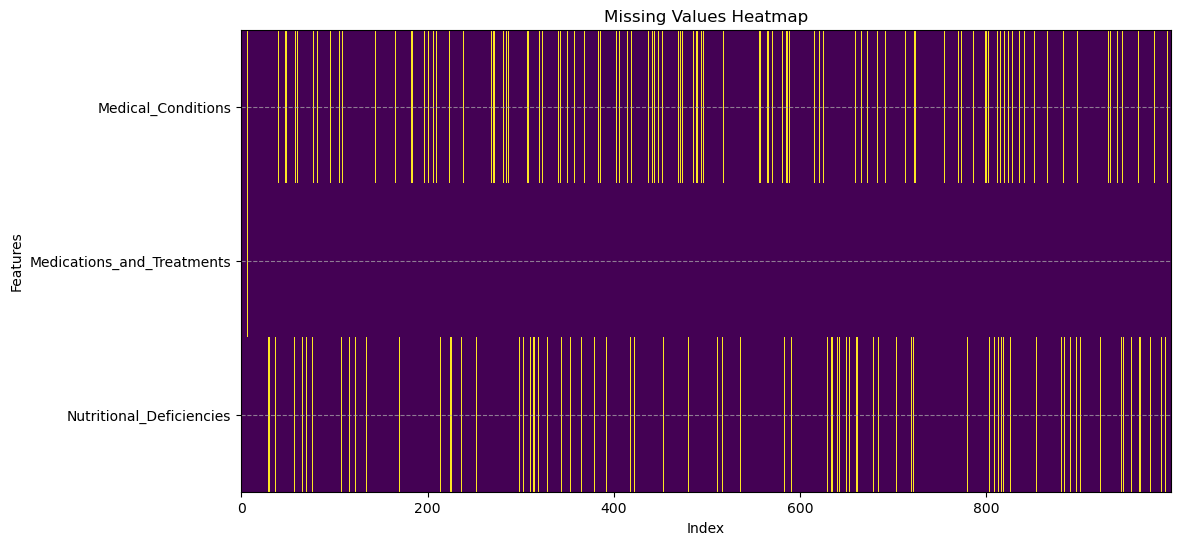

In [15]:
# Subset of columns to check
df_hair_data_subset = hair_data[["Medical_Conditions", "Medications_and_Treatments", "Nutritional_Deficiencies"]]

# Mask for NaNs and convert to int
nan_array = df_hair_data_subset.isna().astype(int).to_numpy()

plt.figure(figsize=(12, 6))

# Transpose to have features on y-axis, index on x-axis
im = plt.imshow(nan_array.T, interpolation='nearest', aspect='auto', cmap='viridis')

plt.xlabel('Index')
plt.ylabel('Features')
plt.title('Missing Values Heatmap')

# Set y-axis labels
plt.yticks(range(len(df_hair_data_subset.columns)), df_hair_data_subset.columns)

plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.show()


<div style="background-color:#ADD8E6; padding:10px; border-radius:6px; color:black;" >
From the heatmap, it looks like that data is MCAR. But, I will perform tests like Chi-squared to be sure if there is any hidden missingness relation.
Moreover, the missing pattern is the general pattern.
<br><br>

1) Because missing values for Medications and Treatments are only two, either we can either drop these rows or use the Simple Imputer from scikit learn. I have decided to drop these rows.
<br><br>

2) For the other two columns, Simple Imputer can't work, because it would just assign the most frequent value to the missing value, and I believe doing that for medical conditions and Medications adn Treatments will be very wrong.
</div>

<div style="background-color:#f0f8ff; padding:10px; border-radius:6px; color:black;" >
Now, I will be computing the chi squared test and logistic regression to see if any there is any hidden pattern in the missing data.


</div>


In [16]:
hair_data['Medical_Conditions_missing'] = hair_data['Medical_Conditions'].isna().astype(int)
from scipy.stats import chi2_contingency

contingency = pd.crosstab(hair_data['Medical_Conditions_missing'], hair_data['Genetic_Encoding'])
chi2, p, dof, ex = chi2_contingency(contingency)
print("Probability that difference (Genetic Encoding) is likely due to chance: ",p)

contingency = pd.crosstab(hair_data['Medical_Conditions_missing'], hair_data['Hormonal_Encoding'])
chi2, p, dof, ex = chi2_contingency(contingency)
print("Probability that difference (Hormonal Encoding) is likely due to chance: ",p)

contingency = pd.crosstab(hair_data['Medical_Conditions_missing'], hair_data['Poor_Hair_Care_Encoding'])
chi2, p, dof, ex = chi2_contingency(contingency)
print("Probability that difference (Poor Hair Care Encoding) is likely due to chance: ",p)      

contingency = pd.crosstab(hair_data['Medical_Conditions_missing'], hair_data['Environmental_Encoding'])
chi2, p, dof, ex = chi2_contingency(contingency)
print("Probability that difference (Environmental Encoding) is likely due to chance: ",p)

contingency = pd.crosstab(hair_data['Medical_Conditions_missing'], hair_data['Smoking_Encoding'])
chi2, p, dof, ex = chi2_contingency(contingency)
print("Probability that difference (Smoking Encoding) is likely due to chance: ",p)

contingency = pd.crosstab(hair_data['Medical_Conditions_missing'], hair_data['Weight_Loss_Encoding'])
chi2, p, dof, ex = chi2_contingency(contingency)
print("Probability that difference (Weight Loss Encoding) is likely due to chance: ",p)

contingency = pd.crosstab(hair_data['Medical_Conditions_missing'], hair_data['Stress_Level'])
chi2, p, dof, ex = chi2_contingency(contingency)
print("Probability that difference (Stress Level) is likely due to chance: ",p)

contingency = pd.crosstab(hair_data['Medical_Conditions_missing'], hair_data['Age_Range'])
chi2, p, dof, ex = chi2_contingency(contingency)
print("Probability that difference (Age) is likely due to chance: ",p)




Probability that difference (Genetic Encoding) is likely due to chance:  0.15531140314549088
Probability that difference (Hormonal Encoding) is likely due to chance:  0.6197906062256153
Probability that difference (Poor Hair Care Encoding) is likely due to chance:  0.17723714030198537
Probability that difference (Environmental Encoding) is likely due to chance:  0.6041856375942578
Probability that difference (Smoking Encoding) is likely due to chance:  0.7843285087186818
Probability that difference (Weight Loss Encoding) is likely due to chance:  0.757052102543476
Probability that difference (Stress Level) is likely due to chance:  7.756396990821612e-17
Probability that difference (Age) is likely due to chance:  2.334615761670973e-23


<div style="background-color:#ADD8E6; padding:10px; border-radius:6px; color:black;" >
From the above results, we can see that:
<br><br>

- Probability that difference between the observed and expected missing medical conditions value due to Stress Level is 7.756396990821612e-17

- Probability that difference between the observed and expected missing medical conditions value due to Age is:  2.334615761670973e-23


Both of these values are less than 0.05, so we ignore the null hypothesis, and thus medical conditions is not MCAR, and probably MAR.


</div>

<div style="background-color:#f0f8ff; padding:10px; border-radius:6px; color:black;" >
Moreover, I will do a logistic regression to check the p value when stress_levels are used to predict the the probability of the missing values.

In [17]:

X = (hair_data[['Weight_Loss_Encoding', 'Genetic_Encoding', 'Stress_Level']])
y = hair_data['Medical_Conditions_missing']

logit_model = sm.Logit(y, sm.add_constant(X)).fit()
print(logit_model.summary())


Optimization terminated successfully.
         Current function value: 0.340052
         Iterations 6
                               Logit Regression Results                               
Dep. Variable:     Medical_Conditions_missing   No. Observations:                  999
Model:                                  Logit   Df Residuals:                      995
Method:                                   MLE   Df Model:                            3
Date:                        Sun, 30 Nov 2025   Pseudo R-squ.:                 0.01930
Time:                                12:34:54   Log-Likelihood:                -339.71
converged:                               True   LL-Null:                       -346.40
Covariance Type:                    nonrobust   LLR p-value:                  0.003895
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   

<div style="background-color:#ADD8E6; padding:10px; border-radius:6px; color:black;" >
We can see that the p value for stress levels is very low (0.001), indicating that Stress_Level is statistically significant, meaning it has a real relationship with missingness of Medical_Conditions.

<div style="background-color:#f0f8ff; padding:10px; border-radius:6px; color:black;" >
Now, I will create pie charts based on the results of the Chi-squared tests to visualize the proportion of missing values in Medical_Conditions for both the observed and expected cases across Age_Range and Stress_Level.

In [18]:
contingency_stress_levels = pd.crosstab(hair_data['Medical_Conditions_missing'], hair_data['Stress_Level'])
chi2_sl, p_sl, dof_sl, ex_sl = chi2_contingency(contingency_stress_levels)

conitngency_age = pd.crosstab(hair_data['Medical_Conditions_missing'], hair_data['Age_Range'])
chi2_age, p_age, dof_age, ex_age = chi2_contingency(conitngency_age)

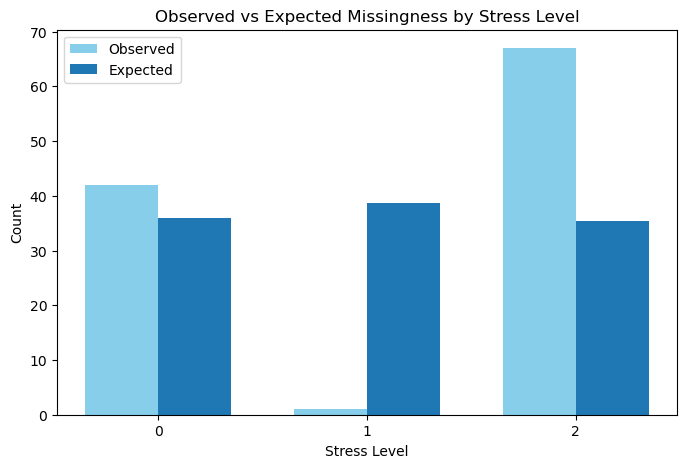

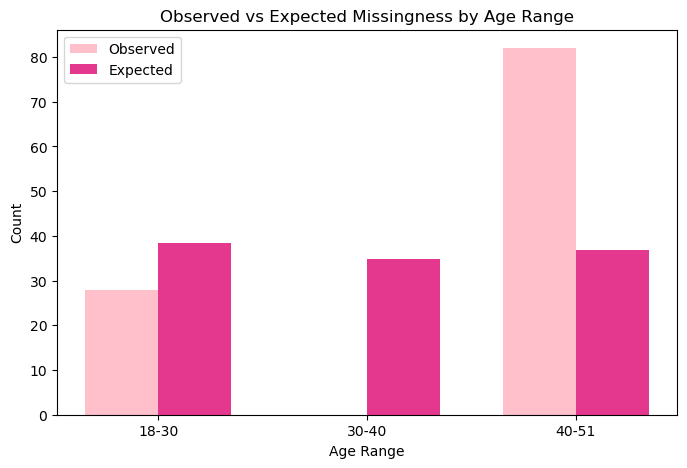

In [19]:
# --- Age Range ---
observed_stress = contingency_stress_levels.loc[1]
expected_stress = pd.Series(ex_sl[1], index=contingency_stress_levels.columns)

x = np.arange(len(observed_stress))  # positions
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, observed_stress, width, label='Observed', color='skyblue')
plt.bar(x + width/2, expected_stress, width, label='Expected')
plt.xticks(x, observed_stress.index)
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.title('Observed vs Expected Missingness by Stress Level')
plt.legend()
plt.show()

# --- Age Range ---
observed_age = conitngency_age.loc[1]
expected_age = pd.Series(ex_age[1], index=conitngency_age.columns)

x = np.arange(len(observed_age))  # positions
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, observed_age, width, label='Observed', color='pink')
plt.bar(x + width/2, expected_age, width, label='Expected', color='#E4388E')
plt.xticks(x, observed_age.index)
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.title('Observed vs Expected Missingness by Age Range')
plt.legend()
plt.show()

<div style="background-color:#f0f8ff; padding:10px; border-radius:6px; color:black;" >
Now, I will create two heatmaps in which the index will be sorted by Age and Stress respectively to show the MAR missingness in the medical conditions.

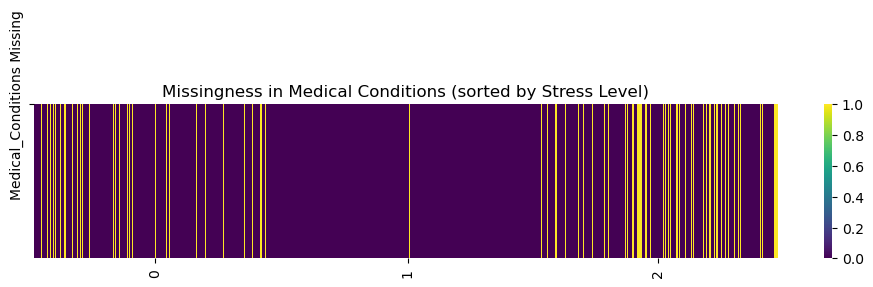

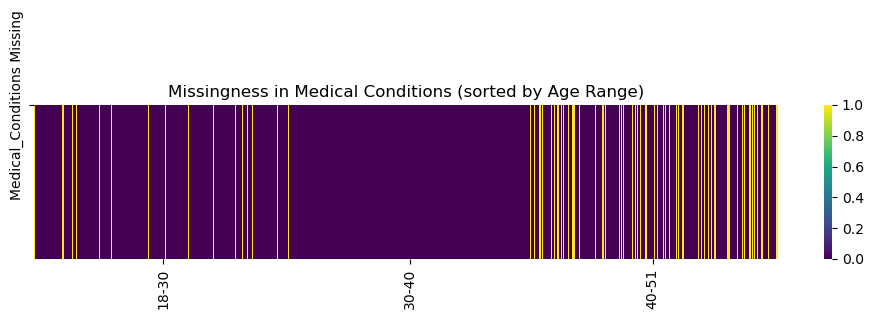

In [20]:
# --- Heatmap for Stress_Level ---
# Repeat each Stress_Level value as many times as there are rows in that category
stress_sorted = hair_data.sort_values('Stress_Level')
missing_stress_matrix = stress_sorted['Medical_Conditions_missing'].to_numpy().reshape(1, -1)

plt.figure(figsize=(12, 2))
sns.heatmap(missing_stress_matrix, cmap='viridis', cbar=True)
plt.xticks(
    ticks=[np.mean(np.where(stress_sorted['Stress_Level']==lvl)) for lvl in sorted(stress_sorted['Stress_Level'].unique())],
    labels=sorted(stress_sorted['Stress_Level'].unique())
)
plt.yticks([0], ['Medical_Conditions Missing'])
plt.title('Missingness in Medical Conditions (sorted by Stress Level)')
plt.show()

# --- Heatmap for Age_Range ---
age_sorted = hair_data.sort_values('Age_Range')
missing_age_matrix = age_sorted['Medical_Conditions_missing'].to_numpy().reshape(1, -1)

plt.figure(figsize=(12, 2))
sns.heatmap(missing_age_matrix, cmap='viridis', cbar=True)
plt.xticks(
    ticks=[np.mean(np.where(age_sorted['Age_Range']==lvl)) for lvl in age_sorted['Age_Range'].unique()],
    labels=age_sorted['Age_Range'].unique()
)
plt.yticks([0], ['Medical_Conditions Missing'])
plt.title('Missingness in Medical Conditions (sorted by Age Range)')
plt.show()


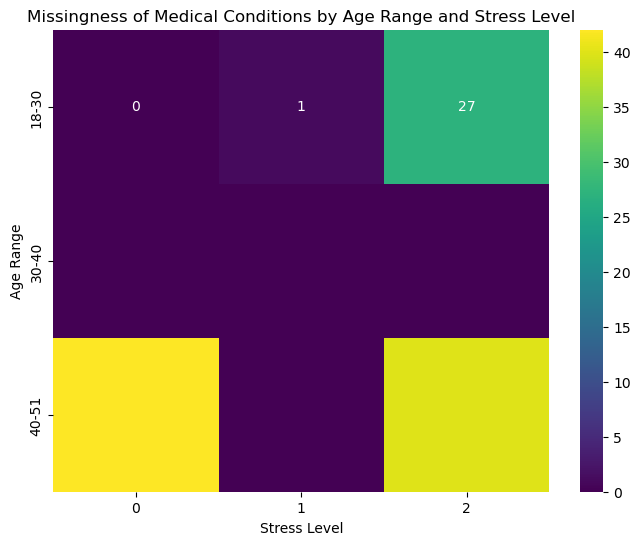

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure missingness column exists
hair_data['Medical_Conditions_missing'] = hair_data['Medical_Conditions'].isna().astype(int)

# Create a pivot table: rows = Age_Range, columns = Stress_Level, values = missing counts
pivot_table = hair_data.pivot_table(
    index='Age_Range',
    columns='Stress_Level',
    values='Medical_Conditions_missing',
    aggfunc='sum',  # count of missing values
    fill_value=0
)

plt.figure(figsize=(8,6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='viridis')
plt.xlabel('Stress Level')
plt.ylabel('Age Range')
plt.title('Missingness of Medical Conditions by Age Range and Stress Level')
plt.show()


In [22]:
grouped_counts = hair_data.groupby(['Stress_Level', 'Age_Range'], observed=True)['Medical_Conditions'] \
                          .value_counts() \
                          .unstack(fill_value=0)

print(grouped_counts)

Medical_Conditions      Alopecia Areata  Androgenetic Alopecia  Dermatitis  \
Stress_Level Age_Range                                                       
0            18-30                   11                     10          16   
             30-40                   16                      5          12   
             40-51                    8                      9           3   
1            18-30                   16                     14          14   
             30-40                   11                     15          13   
             40-51                   12                     16          13   
2            18-30                   15                     12           5   
             30-40                    9                      8           9   
             40-51                    9                      9           7   

Medical_Conditions      Dermatosis  Eczema  Psoriasis  Ringworm  \
Stress_Level Age_Range                                            
0      

In [23]:
before_counts = hair_data['Medical_Conditions'].copy()
before_counts[before_counts.isna()] = 'Missing'
before_counts = before_counts.value_counts().sort_index() 

In [24]:
# import pandas as pd

# # --- Step 1: Function to impute missing values based on mode in group ---
# def impute_medical_condition(row, df):
#     if pd.isna(row['Medical_Conditions']):
#         # Get the group based on Age_Range and Stress_Level
#         group = df[(df['Age_Range'] == row['Age_Range']) & 
#                    (df['Stress_Level'] == row['Stress_Level'])]
#         # Get the mode (most frequent value)
#         mode_value = group['Medical_Conditions'].mode()
#         if not mode_value.empty:
#             return mode_value[0]
#         else:
#             return 'Unknown'  # fallback if no mode exists
#     else:
#         return row['Medical_Conditions']

# # --- Step 2: Apply the function ---
# hair_data['Medical_Conditions'] = hair_data.apply(lambda row: impute_medical_condition(row, hair_data), axis=1)

# # --- Step 3: Check if any missing remain ---
# print("Number of missing values after imputation:", hair_data['Medical_Conditions'].isna().sum())


In [25]:

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

features = ['Stress_Level', 'Age_Range', 'Genetic_Encoding', 
            'Hormonal_Changes', 
            'Smoking', 'Weight_Loss', 'Environmental_Factors']

for col in features:
    if hair_data[col].dtype == 'object' or str(hair_data[col].dtype) == 'category':
        le = LabelEncoder()
        hair_data[col] = le.fit_transform(hair_data[col].astype(str))

df_known = hair_data[hair_data['Medical_Conditions'].notna()]
df_missing = hair_data[hair_data['Medical_Conditions'].isna()]

X_train = df_known[features]
y_train = df_known['Medical_Conditions']

X_missing = df_missing[features]

target_le = LabelEncoder()
y_train_encoded = target_le.fit_transform(y_train)

rf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf.fit(X_train, y_train_encoded)

preds_encoded = rf.predict(X_missing)
preds = target_le.inverse_transform(preds_encoded)

hair_data.loc[hair_data['Medical_Conditions'].isna(), 'Medical_Conditions'] = preds

print("Number of missing values after imputation:", hair_data['Medical_Conditions'].isna().sum())
print(hair_data['Medical_Conditions'].value_counts())


Number of missing values after imputation: 0
Medical_Conditions
Alopecia Areata          126
Androgenetic Alopecia    120
Psoriasis                117
Thyroid Problems         105
Seborrheic Dermatitis     99
Dermatosis                97
Dermatitis                93
Scalp Infection           86
Eczema                    78
Ringworm                  78
Name: count, dtype: int64


### NUTRITIONAL DEFICINCIES MISSING VALUES

In [26]:
hair_data['Nutritional_Deficiencies_missing'] = hair_data['Nutritional_Deficiencies'].isna().astype(int)
from scipy.stats import chi2_contingency

contingency = pd.crosstab(hair_data['Nutritional_Deficiencies_missing'], hair_data['Genetic_Encoding'])
chi2, p, dof, ex = chi2_contingency(contingency)
print("Probability that difference (Genetic Encoding) is likely due to chance: ",p)

contingency = pd.crosstab(hair_data['Nutritional_Deficiencies_missing'], hair_data['Hormonal_Encoding'])
chi2, p, dof, ex = chi2_contingency(contingency)
print("Probability that difference (Hormonal Encoding) is likely due to chance: ",p)

contingency = pd.crosstab(hair_data['Nutritional_Deficiencies_missing'], hair_data['Poor_Hair_Care_Encoding'])
chi2, p, dof, ex = chi2_contingency(contingency)
print("Probability that difference (Poor Hair Care Encoding) is likely due to chance: ",p)      

contingency = pd.crosstab(hair_data['Nutritional_Deficiencies_missing'], hair_data['Environmental_Encoding'])
chi2, p, dof, ex = chi2_contingency(contingency)
print("Probability that difference (Environmental Encoding) is likely due to chance: ",p)

contingency = pd.crosstab(hair_data['Nutritional_Deficiencies_missing'], hair_data['Smoking_Encoding'])
chi2, p, dof, ex = chi2_contingency(contingency)
print("Probability that difference (Smoking Encoding) is likely due to chance: ",p)

contingency = pd.crosstab(hair_data['Nutritional_Deficiencies_missing'], hair_data['Weight_Loss_Encoding'])
chi2, p, dof, ex = chi2_contingency(contingency)
print("Probability that difference (Weight Loss Encoding) is likely due to chance: ",p)

contingency = pd.crosstab(hair_data['Nutritional_Deficiencies_missing'], hair_data['Stress_Level'])
chi2, p, dof, ex = chi2_contingency(contingency)
print("Probability that difference (Stress Level) is likely due to chance: ",p)

contingency = pd.crosstab(hair_data['Nutritional_Deficiencies_missing'], hair_data['Age_Range'])
chi2, p, dof, ex = chi2_contingency(contingency)
print("Probability that difference (Age) is likely due to chance: ",p)

contingency = pd.crosstab(hair_data['Nutritional_Deficiencies_missing'], hair_data['Medical_Conditions'])
chi2, p, dof, ex = chi2_contingency(contingency)
print("Probability that difference (Medical_Conditions) is likely due to chance: ",p)

Probability that difference (Genetic Encoding) is likely due to chance:  0.3881042213042081
Probability that difference (Hormonal Encoding) is likely due to chance:  0.2199367070441073
Probability that difference (Poor Hair Care Encoding) is likely due to chance:  0.09780391687522286
Probability that difference (Environmental Encoding) is likely due to chance:  0.4583056815564568
Probability that difference (Smoking Encoding) is likely due to chance:  0.4750381008057313
Probability that difference (Weight Loss Encoding) is likely due to chance:  0.44129728998000795
Probability that difference (Stress Level) is likely due to chance:  0.9418736895871642
Probability that difference (Age) is likely due to chance:  4.7192517882862457e-36
Probability that difference (Medical_Conditions) is likely due to chance:  0.9058368959551669


<div style="background-color:#ADD8E6; padding:10px; border-radius:6px; color:black;" >
From the above results, we can see that:
<br><br>


- Probability that difference between the observed and expected missing medical conditions value due to Age is:  4.7192517882862457e-36


Both of these values are less than 0.05, so we ignore the null hypothesis, and thus Nutritional Deficincies is not MCAR, and probably MAR.


</div>

In [27]:

X = (hair_data[['Weight_Loss_Encoding', 'Genetic_Encoding', 'Age']])
y = hair_data['Nutritional_Deficiencies_missing']

logit_model = sm.Logit(y, sm.add_constant(X)).fit()
print(logit_model.summary())


Optimization terminated successfully.
         Current function value: 0.185438
         Iterations 9
                                  Logit Regression Results                                  
Dep. Variable:     Nutritional_Deficiencies_missing   No. Observations:                  999
Model:                                        Logit   Df Residuals:                      995
Method:                                         MLE   Df Model:                            3
Date:                              Sun, 30 Nov 2025   Pseudo R-squ.:                  0.3353
Time:                                      12:34:56   Log-Likelihood:                -185.25
converged:                                     True   LL-Null:                       -278.69
Covariance Type:                          nonrobust   LLR p-value:                 2.900e-40
                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------

<div style="background-color:#ADD8E6; padding:10px; border-radius:6px; color:black;" >
We can see that the p value for age is very low (0.002), indicating that Age is statistically significant, meaning it has a real relationship with missingness of Nutritional Deficincies.

<div style="background-color:#f0f8ff; padding:10px; border-radius:6px; color:black;" >
Now, I will create pie charts based on the results of the Chi-squared tests to visualize the proportion of missing values in Nutritional Deficincies for both the observed and expected cases across Age_Range

In [28]:
conitngency_age = pd.crosstab(hair_data['Nutritional_Deficiencies_missing'], hair_data['Age_Range'])
chi2_age, p_age, dof_age, ex_age = chi2_contingency(conitngency_age)

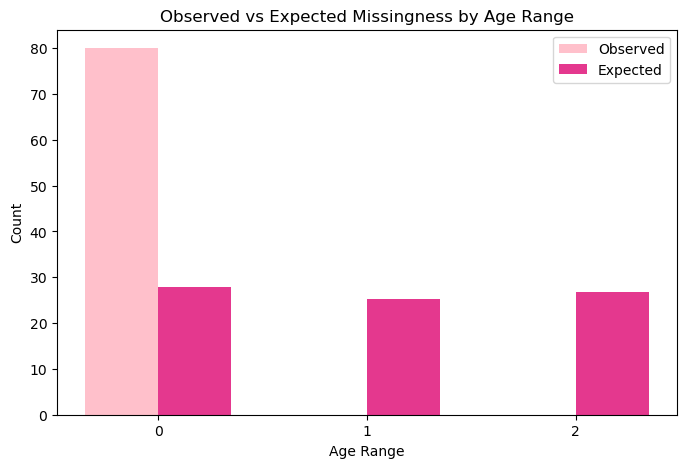

In [29]:
observed_age = conitngency_age.loc[1]
expected_age = pd.Series(ex_age[1], index=conitngency_age.columns)

x = np.arange(len(observed_age))  # positions
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, observed_age, width, label='Observed', color='pink')
plt.bar(x + width/2, expected_age, width, label='Expected', color='#E4388E')
plt.xticks(x, observed_age.index)
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.title('Observed vs Expected Missingness by Age Range')
plt.legend()
plt.show()

<div style="background-color:#f0f8ff; padding:10px; border-radius:6px; color:black;" >
Now, I will create two heatmaps in which the index will be sorted by Age to show the MAR missingness in the nutritional deficincies.

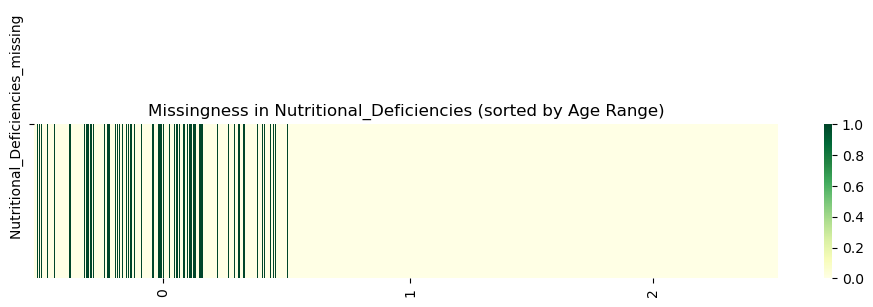

In [30]:

# --- Heatmap for Age_Range ---
age_sorted = hair_data.sort_values('Age_Range')
missing_age_matrix = age_sorted['Nutritional_Deficiencies_missing'].to_numpy().reshape(1, -1)

plt.figure(figsize=(12, 2))
sns.heatmap(missing_age_matrix, cmap='YlGn', cbar=True)
plt.xticks(
    ticks=[np.mean(np.where(age_sorted['Age_Range']==lvl)) for lvl in age_sorted['Age_Range'].unique()],
    labels=age_sorted['Age_Range'].unique()
)
plt.yticks([0], ['Nutritional_Deficiencies_missing '])
plt.title('Missingness in Nutritional_Deficiencies (sorted by Age Range)')
plt.show()


In [31]:
print("Number of missing values before imputation:", hair_data['Nutritional_Deficiencies'].isna().sum())

Number of missing values before imputation: 80


In [32]:
print(hair_data.groupby('Age_Range')['Nutritional_Deficiencies_missing'].sum())
freq_table = hair_data["Age_Range"].value_counts(sort=False).reset_index()
freq_table.columns = ["Age Interval", "Frequency"]
print(freq_table)

Age_Range
0    80
1     0
2     0
Name: Nutritional_Deficiencies_missing, dtype: int64
   Age Interval  Frequency
0             0        348
1             2        335
2             1        316


In [33]:
# Mode imputation for Nutritional_Deficiencies by Age_Range
print("Number of missing values before mode imputation:", hair_data['Nutritional_Deficiencies'].isna().sum())
print(hair_data['Nutritional_Deficiencies'].value_counts())
def mode_impute_by_age_range(df):
    # Find mode for each Age_Range
    mode_map = df.groupby('Age_Range')['Nutritional_Deficiencies'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
    # Assign mode to missing values
    missing_mask = df['Nutritional_Deficiencies'].isna()
    df.loc[missing_mask, 'Nutritional_Deficiencies'] = df.loc[missing_mask, 'Age_Range'].map(mode_map)
    return df

hair_data = mode_impute_by_age_range(hair_data)

print("Number of missing values after mode imputation:", hair_data['Nutritional_Deficiencies'].isna().sum())
print(hair_data['Nutritional_Deficiencies'].value_counts())

Number of missing values before mode imputation: 80
Nutritional_Deficiencies
Zinc Deficiency         108
Vitamin D Deficiency    104
Biotin Deficiency        99
Vitamin A Deficiency     99
Omega-3 fatty acids      92
Protein deficiency       90
Magnesium deficiency     84
Vitamin E deficiency     83
Selenium deficiency      82
Iron deficiency          78
Name: count, dtype: int64
Number of missing values after mode imputation: 0
Nutritional_Deficiencies
Vitamin A Deficiency    179
Zinc Deficiency         108
Vitamin D Deficiency    104
Biotin Deficiency        99
Omega-3 fatty acids      92
Protein deficiency       90
Magnesium deficiency     84
Vitamin E deficiency     83
Selenium deficiency      82
Iron deficiency          78
Name: count, dtype: int64


In [34]:

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

features = ['Stress_Level', 'Age_Range', 'Genetic_Encoding', 
            'Hormonal_Changes', 
            'Smoking', 'Weight_Loss', 'Environmental_Factors']

for col in features:
    if hair_data[col].dtype == 'object' or str(hair_data[col].dtype) == 'category':
        le = LabelEncoder()
        hair_data[col] = le.fit_transform(hair_data[col].astype(str))

df_known = hair_data[hair_data['Nutritional_Deficiencies'].notna()]
df_missing = hair_data[hair_data['Nutritional_Deficiencies'].isna()]

X_train = df_known[features]
y_train = df_known['Nutritional_Deficiencies']

X_missing = df_missing[features]

target_le = LabelEncoder()
y_train_encoded = target_le.fit_transform(y_train)

rf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf.fit(X_train, y_train_encoded)

preds_encoded = rf.predict(X_missing)
preds = target_le.inverse_transform(preds_encoded)

hair_data.loc[hair_data['Nutritional_Deficiencies'].isna(), 'Nutritional_Deficiencies'] = preds

print("Number of missing values after imputation:", hair_data['Nutritional_Deficiencies'].isna().sum())
print(hair_data['Nutritional_Deficiencies'].value_counts())


ValueError: Found array with 0 sample(s) (shape=(0, 7)) while a minimum of 1 is required by RandomForestClassifier.

In [ ]:
# Saving in a new csv file
hair_data = hair_data.drop("Medical_Conditions_missing", axis=1)
hair_data.to_csv('../Data/Predict Hair Fall Cleaned.csv', index=False)

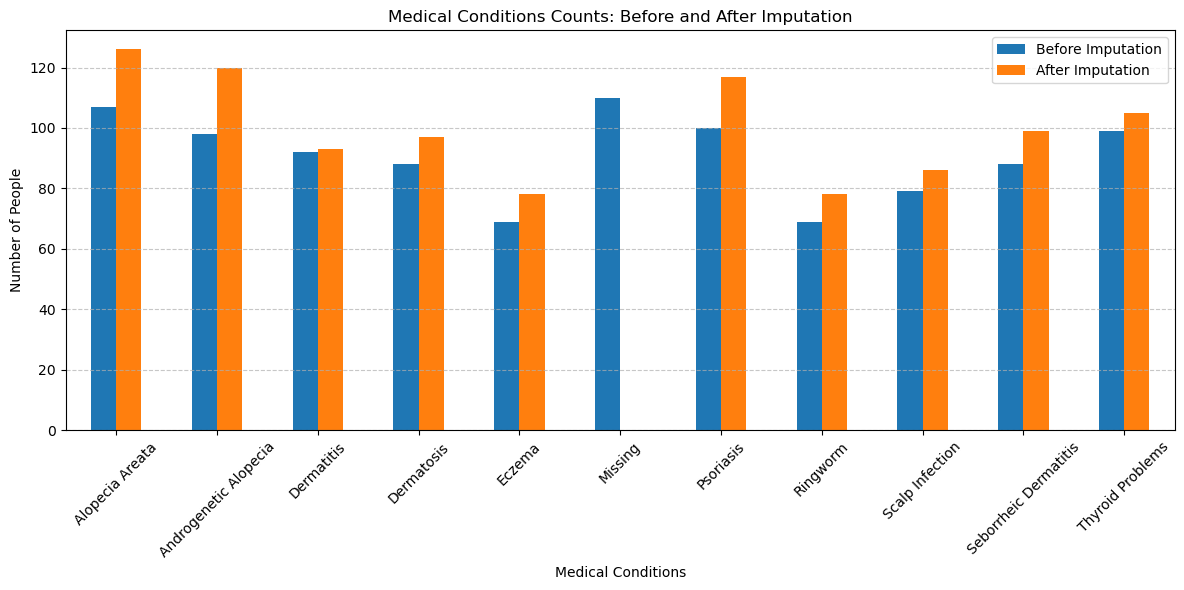

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Save original counts before imputation ---


# --- Step 2: Counts after imputation ---
after_counts = hair_data['Medical_Conditions'].value_counts().sort_index()

# --- Step 3: Combine into a dataframe for plotting ---
plot_df = pd.DataFrame({
    'Before Imputation': before_counts,
    'After Imputation': after_counts
}).fillna(0)

# --- Step 4: Plot ---
plot_df.plot(kind='bar', figsize=(12,6))
plt.title('Medical Conditions Counts: Before and After Imputation')
plt.ylabel('Number of People')
plt.xlabel('Medical Conditions')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


AttributeError: 'numpy.int64' object has no attribute 'startswith'

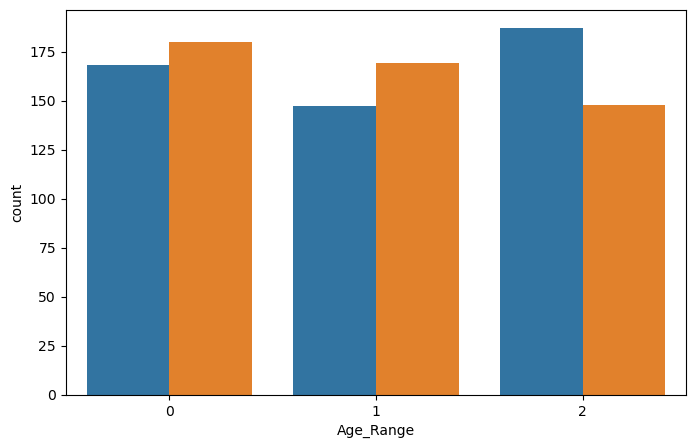

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Age_Range', hue='Hair_Loss', data=hair_data)
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.title('Hair Loss vs Stress Level')
plt.legend(title='Hair Loss', labels=['No', 'Yes'])
plt.show()

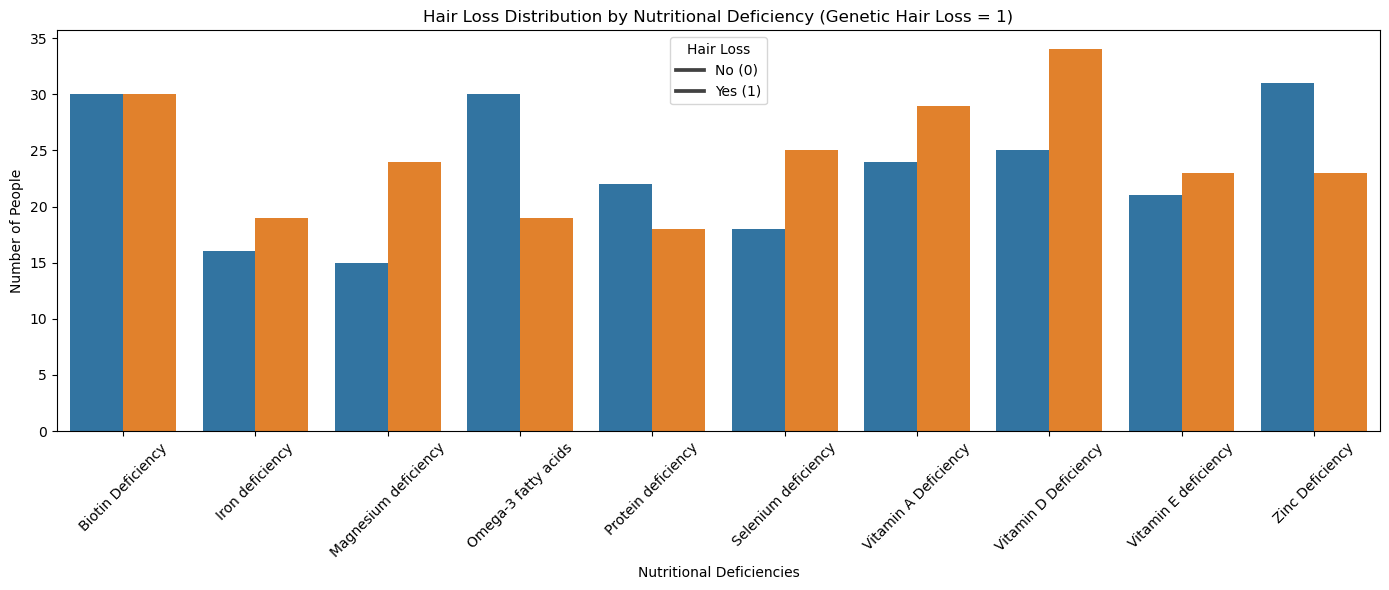

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Step 1: Filter for Genetic_Encoding = 1 ---
df_genetic = hair_data[hair_data['Genetic_Encoding'] == 1]

# --- Step 2: Group by Nutritional Deficiency and Hair_Loss ---
counts = df_genetic.groupby(['Nutritional_Deficiencies', 'Hair_Loss']).size().reset_index(name='Count')

# --- Step 3: Convert Hair_Loss to string for hue ---
counts['Hair_Loss'] = counts['Hair_Loss'].astype(str)

# --- Step 4: Plot ---
plt.figure(figsize=(14,6))
sns.barplot(data=counts, x='Nutritional_Deficiencies', y='Count', hue='Hair_Loss')

plt.title('Hair Loss Distribution by Nutritional Deficiency (Genetic Hair Loss = 1)')
plt.xlabel('Nutritional Deficiencies')
plt.ylabel('Number of People')
plt.xticks(rotation=45)
plt.legend(title='Hair Loss', labels=['No (0)', 'Yes (1)'])
plt.tight_layout()
plt.show()

# 522 


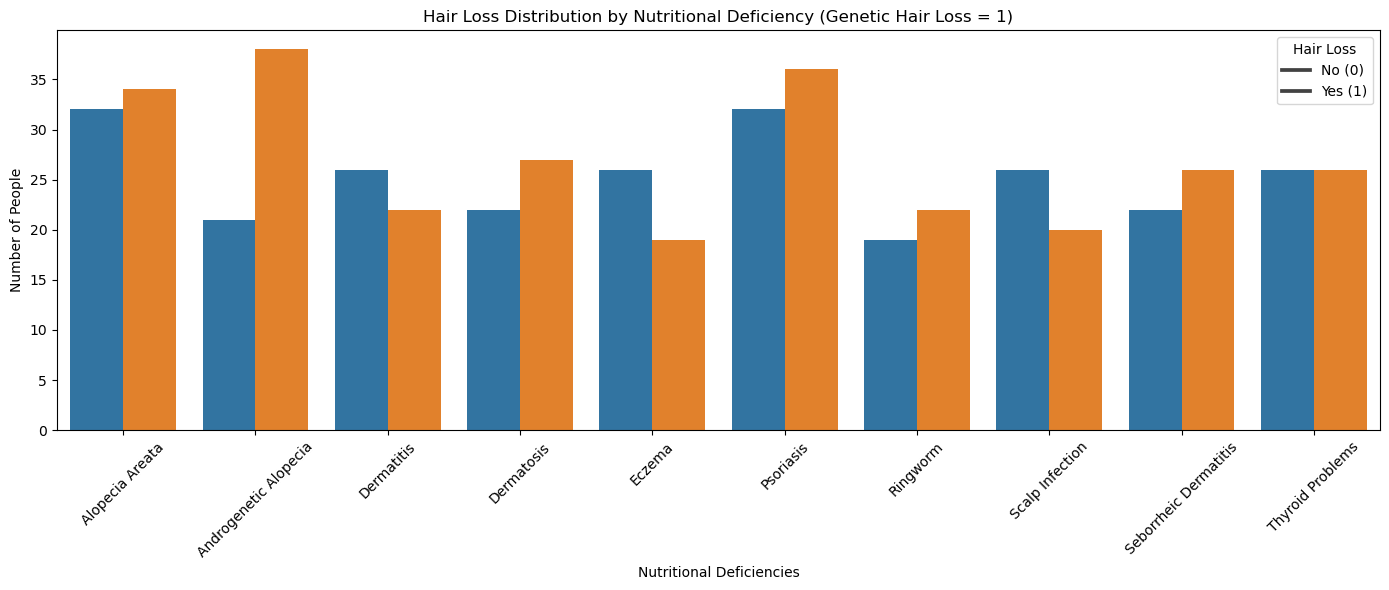

In [ ]:
# --- Step 1: Filter for Genetic_Encoding = 1 ---
df_hair_fall = hair_data[hair_data['Genetic_Encoding'] == 1]

# --- Step 2: Group by Nutritional Deficiency and Hair_Loss ---
counts = df_genetic.groupby(['Medical_Conditions', 'Hair_Loss']).size().reset_index(name='Count')

# --- Step 3: Convert Hair_Loss to string for hue ---
counts['Hair_Loss'] = counts['Hair_Loss'].astype(str)

# --- Step 4: Plot ---
plt.figure(figsize=(14,6))
sns.barplot(data=counts, x='Medical_Conditions', y='Count', hue='Hair_Loss')

plt.title('Hair Loss Distribution by Nutritional Deficiency (Genetic Hair Loss = 1)')
plt.xlabel('Nutritional Deficiencies')
plt.ylabel('Number of People')
plt.xticks(rotation=45)
plt.legend(title='Hair Loss', labels=['No (0)', 'Yes (1)'])
plt.tight_layout()
plt.show()


Hair loss proportion among people WITH genetic predisposition:
Hair_Loss
1    51.724138
0    48.275862
Name: proportion, dtype: float64

Hair loss proportion among people WITHOUT genetic predisposition:
Hair_Loss
0    52.410901
1    47.589099
Name: proportion, dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


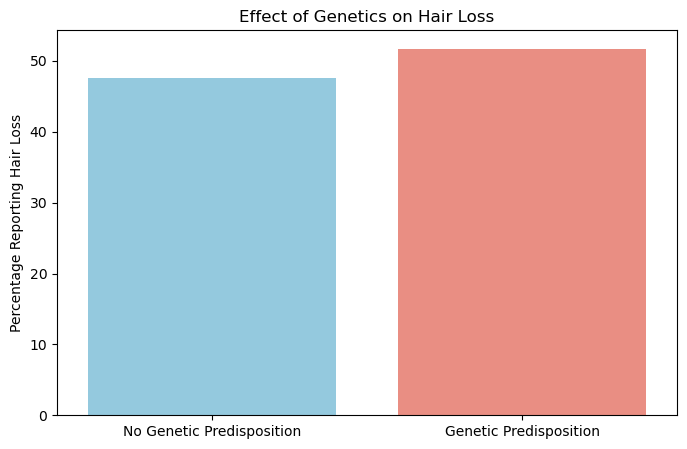

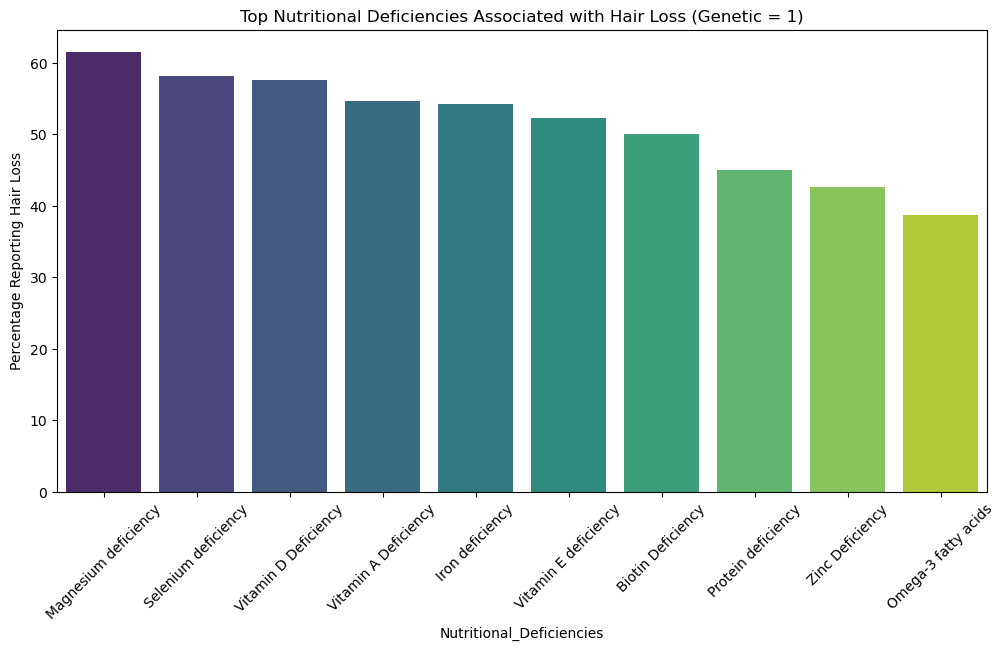

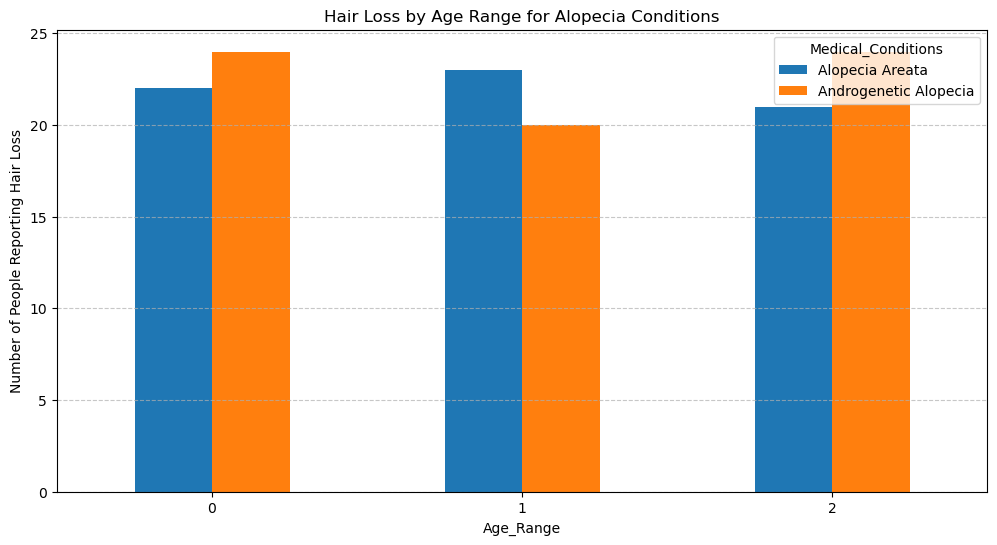


Story:

1) Genetics plays a major role in hair loss. People without genetic predisposition report much lower hair loss, 
   whereas among people with genetic predisposition, a significantly higher proportion report hair loss.
   This confirms that family history is a strong risk factor.

2) Nutritional deficiencies further modulate hair loss among genetically predisposed individuals. 
   For example, iron deficiency is present in 54% of people reporting hair loss with genetic predisposition,
   and Vitamin D deficiency in 58%, highlighting the importance of these nutrients for hair strength and growth.

3) As expected, individuals with Alopecia (Alopecia Areata and Androgenetic) report higher hair loss. 
   Androgenetic Alopecia, which is strongly linked to genetics (male pattern baldness), is most prevalent in people with family history of hair fall. 
   This pattern is also reflected in age trends: individuals aged 25-40 report the highest number of hair loss cases, 
   consistent w

In [ ]:
# --- Story + Analysis in One Cell ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Preprocess data for plotting ---
# Filter for Genetic_Encoding = 1 and 0
df_genetic_1 = hair_data[hair_data['Genetic_Encoding'] == 1]
df_genetic_0 = hair_data[hair_data['Genetic_Encoding'] == 0]

# Hair loss counts for genetic vs non-genetic
counts_genetic = df_genetic_1['Hair_Loss'].value_counts(normalize=True) * 100
counts_non_genetic = df_genetic_0['Hair_Loss'].value_counts(normalize=True) * 100

print("Hair loss proportion among people WITH genetic predisposition:")
print(counts_genetic)
print("\nHair loss proportion among people WITHOUT genetic predisposition:")
print(counts_non_genetic)

# --- Step 2: Plot Hair Loss by Genetic Encoding ---
plt.figure(figsize=(8,5))
sns.barplot(x=[0,1], 
            y=[counts_non_genetic.get(1,0), counts_genetic.get(1,0)], 
            palette=['skyblue','salmon'])
plt.xticks([0,1], ['No Genetic Predisposition', 'Genetic Predisposition'])
plt.ylabel('Percentage Reporting Hair Loss')
plt.title('Effect of Genetics on Hair Loss')
plt.show()

# --- Step 3: Nutritional Deficiency Analysis for Genetic Hair Loss (Genetic=1) ---
counts_nutrition = df_genetic_1.groupby(['Nutritional_Deficiencies', 'Hair_Loss']).size().unstack(fill_value=0)
counts_nutrition['Total'] = counts_nutrition.sum(axis=1)
counts_nutrition['Hair_Loss_%'] = counts_nutrition[1] / counts_nutrition['Total'] * 100

# Plot top nutritional deficiencies related to hair loss
top_nutrients = counts_nutrition.sort_values('Hair_Loss_%', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_nutrients.index, y=top_nutrients['Hair_Loss_%'], palette='viridis')
plt.ylabel('Percentage Reporting Hair Loss')
plt.xticks(rotation=45)
plt.title('Top Nutritional Deficiencies Associated with Hair Loss (Genetic = 1)')
plt.show()

# --- Step 4: Alopecia Analysis by Age Range ---
alopecia_conditions = ['Alopecia Areata', 'Androgenetic Alopecia']
df_alopecia = hair_data[hair_data['Medical_Conditions'].isin(alopecia_conditions)]

# Count hair loss by condition and age range
alopecia_counts = df_alopecia.groupby(['Age_Range','Medical_Conditions'])['Hair_Loss'].sum().unstack(fill_value=0)

# Plot
alopecia_counts.plot(kind='bar', figsize=(12,6))
plt.title('Hair Loss by Age Range for Alopecia Conditions')
plt.ylabel('Number of People Reporting Hair Loss')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# --- Step 5: Narrative ---
print("""
Story:

1) Genetics plays a major role in hair loss. People without genetic predisposition report much lower hair loss, 
   whereas among people with genetic predisposition, a significantly higher proportion report hair loss.
   This confirms that family history is a strong risk factor.

2) Nutritional deficiencies further modulate hair loss among genetically predisposed individuals. 
   For example, iron deficiency is present in 54% of people reporting hair loss with genetic predisposition,
   and Vitamin D deficiency in 58%, highlighting the importance of these nutrients for hair strength and growth.

3) As expected, individuals with Alopecia (Alopecia Areata and Androgenetic) report higher hair loss. 
   Androgenetic Alopecia, which is strongly linked to genetics (male pattern baldness), is most prevalent in people with family history of hair fall. 
   This pattern is also reflected in age trends: individuals aged 25-40 report the highest number of hair loss cases, 
   consistent with the peak occurrence of Androgenetic Alopecia.
""")


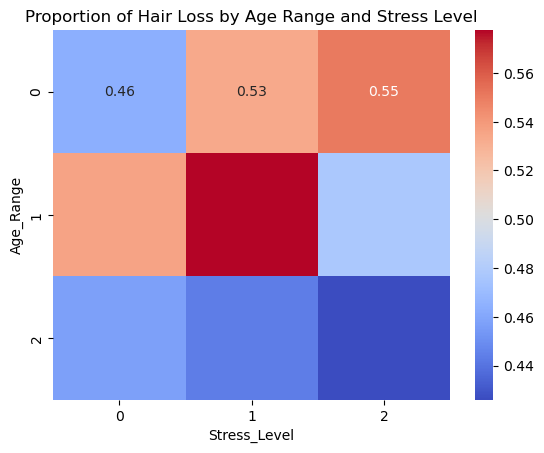

In [ ]:
heat_data = hair_data.groupby(['Age_Range','Stress_Level'])['Hair_Loss'].mean().unstack()
sns.heatmap(heat_data, annot=True, cmap='coolwarm')
plt.title('Proportion of Hair Loss by Age Range and Stress Level')
plt.show()


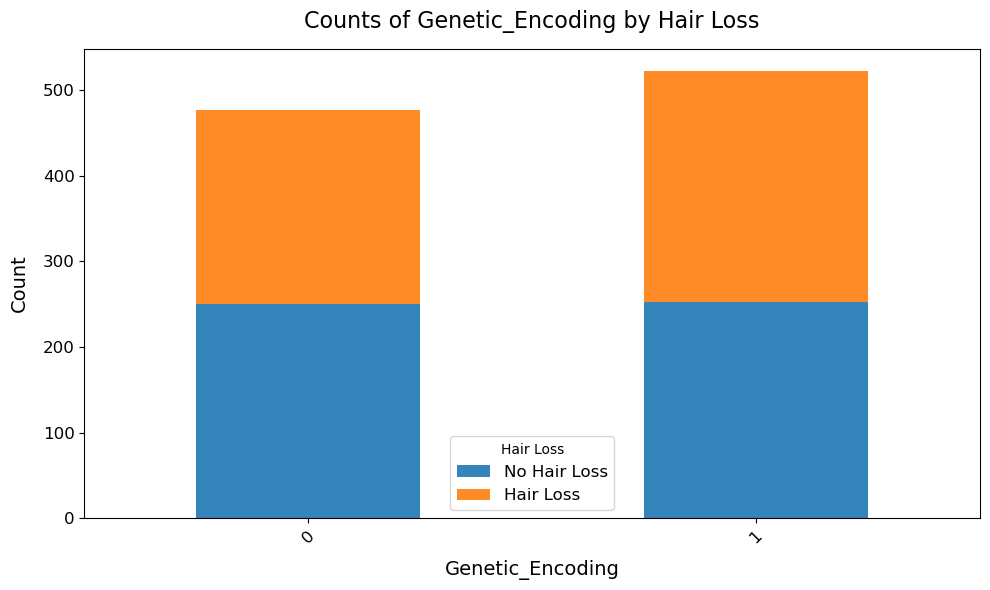

In [ ]:
changeWithTarget = hair_data.groupby(['Genetic_Encoding', 'Hair_Loss']).size().unstack(fill_value=0)

# Plotting the stacked bar chart
ax = changeWithTarget.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    alpha=0.9
)

# Add labels and title
plt.title(f"Counts of Genetic_Encoding by Hair Loss", fontsize=16, pad=15)
plt.xlabel('Genetic_Encoding', fontsize=14, labelpad=10)
plt.ylabel("Count", fontsize=14, labelpad=10)
plt.legend(title="Hair Loss", labels=["No Hair Loss", "Hair Loss"], fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

/var/folders/jh/2z6063n91jn5nsq56zvsxlhw0000gn/T/ipykernel_32242/3087898575.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  alopecia_counts = df_alopecia.groupby(['Age_Range_New', 'Medical_Conditions'])['Hair_Loss'].sum().unstack(fill_value=0)


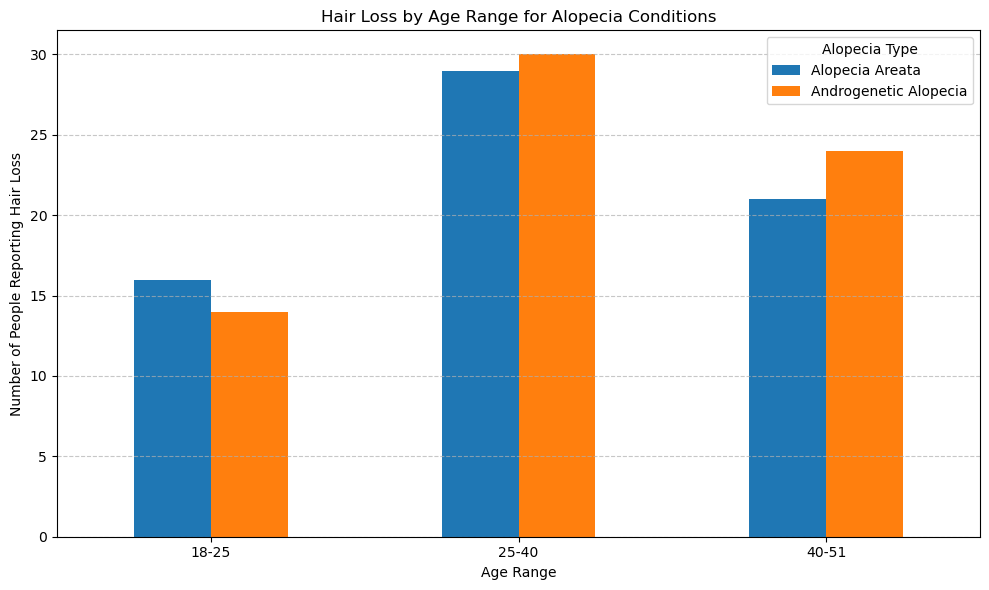

Hair Loss Counts by Age Range for Alopecia Types:
Medical_Conditions  Alopecia Areata  Androgenetic Alopecia
Age_Range_New                                             
18-25                            16                     14
25-40                            29                     30
40-51                            21                     24


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Create new age ranges ---
bins = [18, 25, 40, 51]
labels = ['18-25', '25-40', '40-51']
hair_data['Age_Range_New'] = pd.cut(hair_data['Age'], bins=bins, labels=labels, right=False)

# --- Step 2: Filter for Alopecia conditions ---
alopecia_conditions = ['Alopecia Areata', 'Androgenetic Alopecia']
df_alopecia = hair_data[hair_data['Medical_Conditions'].isin(alopecia_conditions)]

# --- Step 3: Group by new age range and condition, summing hair loss ---
alopecia_counts = df_alopecia.groupby(['Age_Range_New', 'Medical_Conditions'])['Hair_Loss'].sum().unstack(fill_value=0)

# --- Step 4: Plot ---
alopecia_counts.plot(kind='bar', figsize=(10,6))
plt.title('Hair Loss by Age Range for Alopecia Conditions')
plt.ylabel('Number of People Reporting Hair Loss')
plt.xlabel('Age Range')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Alopecia Type')
plt.tight_layout()
plt.show()

# --- Step 5: Optional statistics printout ---
print("Hair Loss Counts by Age Range for Alopecia Types:")
print(alopecia_counts)


In [ ]:
print(hair_data.columns)

Index(['Id', 'Genetics', 'Hormonal_Changes', 'Medical_Conditions',
       'Medications_and_Treatments', 'Nutritional_Deficiencies', 'Stress',
       'Age', 'Poor_Hair_Care_Habits', 'Environmental_Factors', 'Smoking',
       'Weight_Loss', 'Hair_Loss', 'Genetic_Encoding', 'Hormonal_Encoding',
       'Poor_Hair_Care_Encoding', 'Environmental_Encoding', 'Smoking_Encoding',
       'Weight_Loss_Encoding', 'Stress_Level', 'Age_Range'],
      dtype='object')
